In [ ]:
import os
import os.path
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append("..")

In [ ]:
from google.colab import files
data = files.upload()

Saving spx_holdings_and_spx_closeprice.csv to spx_holdings_and_spx_closeprice (3).csv


In [ ]:
from datetime import datetime
custom_date_parser = lambda x: datetime.strptime(x, "%d/%m/%Y").strftime("%Y-%m-%d")
asset_prices = pd.read_csv("spx_holdings_and_spx_closeprice.csv",
                           date_parser=custom_date_parser,
                           index_col=0).dropna()
print('Asset prices shape: ', asset_prices.shape)
# print(asset_prices.AAPL.head())
# print(asset_prices.AAPL.tail())
asset_prices.iloc[:, :15].head()

Asset prices shape:  (3493, 419)


,A,AA,AAPL,ABC,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AGN
O,,,,,,,,,,,,,,,
2000-01-27,46.1112,78.9443,3.9286,4.5485,13.7898,15.6719,48.0313,10.8844,39.5477,8.1250,32.9375,33.5625,37.9375,20.5938,39.688
2000-01-28,45.8585,77.8245,3.6295,4.5485,14.2653,14.3906,47.7500,10.7143,38.5627,7.7188,32.3125,33.0000,38.1875,21.0000,40.250
2000-01-31,44.5952,78.0345,3.7054,4.3968,14.5730,13.7656,46.7500,10.6576,37.3807,7.6406,32.5625,33.5000,40.0625,21.7188,40.313
2000-02-01,47.8377,80.7640,3.5804,4.5333,14.7128,13.9688,49.0000,10.8844,37.9717,7.9219,32.5625,33.6875,40.3750,22.1563,41.375
2000-02-02,51.5434,83.4934,3.5290,4.5788,14.7968,15.3281,48.1250,10.6576,35.9032,7.9688,32.5625,33.6250,39.6563,22.1875,42.813


In [ ]:
print('Last column contains SPX index prices:')
asset_prices.iloc[:, -10:].tail()

Last column contains SPX index prices:


,STJ,SVU,SWY,TEG,TER,TGNA,THC,X,MAR.1,SPX
O,,,,,,,,,,
2013-12-16,56.0649,46.13,28.3837,50.4479,15.7890,12.4337,40.61,26.0264,44.6344,1786.54
2013-12-17,56.4258,46.83,28.3401,50.2511,16.1250,12.3964,39.86,26.0648,44.4022,1781.00
2013-12-18,57.4609,47.53,28.6980,51.1603,16.0194,12.7089,40.92,26.1321,45.3786,1810.65
2013-12-19,57.7552,48.09,28.6456,50.6260,15.9042,12.8162,39.85,27.4953,45.2364,1809.60
2013-12-20,58.7713,49.14,28.8725,51.4227,16.0578,12.9701,40.31,26.8329,45.6440,1818.32


In [ ]:
asset_prices.columns.values

array(['A', 'AA', 'AAPL', 'ABC', 'ABT', 'ADBE', 'ADI', 'ADM', 'ADP',
       'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AGN', 'AIG', 'AIV', 'AKAM',
       'AKS', 'ALL', 'AMAT', 'AMD', 'AMGN', 'AMT', 'AMZN', 'AN', 'ANDV',
       'ANF', 'AON', 'APA', 'APC', 'APD', 'APH', 'APOL', 'ARG', 'ATGE',
       'AVB', 'AVY', 'AXP', 'AZO', 'BA', 'BAC', 'BAX', 'BBT', 'BBY',
       'BCR', 'BDX', 'BEN', 'BHGE', 'BIIB', 'BK', 'BLL', 'BMY', 'BRCM',
       'BSX', 'BXP', 'C', 'CA', 'CAG', 'CAH', 'CAM', 'CAT', 'CB', 'CBS',
       'CCL', 'CELG', 'CERN', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLF',
       'CLX', 'CMA', 'CMCSA', 'CMI', 'CMS', 'CNP', 'CNX', 'COF', 'COG',
       'COP', 'COST', 'CPB', 'CSCO', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS',
       'CVS', 'CVX', 'D', 'DE', 'DF', 'DGX', 'DHI', 'DHR', 'DIS', 'DNR',
       'DO', 'DOV', 'DRI', 'DTE', 'DUK', 'DVA', 'DVN', 'EA', 'EBAY',
       'ECL', 'ED', 'EFX', 'EIX', 'EL', 'EMN', 'EMR', 'EOG', 'EQR', 'EQT',
       'ES', 'ESRX', 'ETFC', 'ETN', 'ETR', 'EXC', 'EXPD', 'F', '

In [ ]:
asset_returns = pd.DataFrame(data=np.zeros(shape=(len(asset_prices.index), asset_prices.shape[1])),
                             columns=asset_prices.columns.values,
                             index=asset_prices.index)
normed_returns = asset_returns
# normed_returns is pandas.DataFrame that should contain normalized returns
asset_returns = asset_prices.pct_change().dropna()
normed_returns = (asset_returns - asset_returns.mean()) / asset_returns.std()

#asset_returns.iloc[-5: , -10:].head()
normed_returns.iloc[-5:, -10:].head()

,STJ,SVU,SWY,TEG,TER,TGNA,THC,X,MAR.1,SPX
O,,,,,,,,,,
2013-12-16,0.852722,0.965219,-1.168885,0.884751,0.095865,0.656639,0.180014,-0.238498,0.465047,0.467931
2013-12-17,0.275173,0.517307,-0.086106,-0.306213,0.589689,-0.118610,-0.549523,0.025268,-0.260013,-0.247921
2013-12-18,0.864485,0.509435,0.600714,1.210605,-0.190024,0.925461,0.756998,0.058428,0.952458,1.252703
2013-12-19,0.210069,0.399574,-0.100159,-0.757419,-0.208023,0.304913,-0.772205,1.544228,-0.167775,-0.056358
2013-12-20,0.827306,0.748420,0.372443,1.048113,0.264046,0.436874,0.320641,-0.740854,0.373717,0.353859


In [ ]:
part_1=list(normed_returns.iloc[0,: 100].to_numpy().squeeze())
try:
    part1 = " ".join(map(repr, part_1))
except TypeError:
    part1 = repr(part_1)
normed_returns.iloc[0,: 100].to_numpy().squeeze()

array([-0.19005437, -0.51371017, -2.71470869, -0.04977943,  2.18293305,
       -2.68413088, -0.21246093, -0.76699639, -1.5407309 , -1.80394666,
       -1.37299129, -0.99416907,  0.16136183,  0.72980366,  0.63485621,
       -0.72131907, -0.01302927, -0.80797756,  0.39923062, -0.75893259,
       -1.43444651, -1.12783867, -1.29385343, -0.44802859, -2.13973399,
        0.58949813, -0.87826364,  0.31428572, -1.08060243, -0.31367868,
        0.11819333, -1.8686777 , -1.87275168, -0.22608376, -0.04189121,
       -0.02136145, -0.60458719, -1.43087396, -1.16679677, -1.65594274,
       -0.50493241, -1.5196492 , -0.36359946, -0.58859176, -0.73289901,
        0.87654672, -3.12410596, -1.33977245, -1.33866029, -0.53051976,
       -1.28309222, -2.2171311 ,  1.75785074,  0.22815795, -0.48093428,
       -0.21160476, -1.39163378, -1.8907977 , -1.26523275, -0.90790361,
        1.20007622, -1.13783598, -1.06735573, -1.49029484,  1.65191927,
       -0.94841616,  3.36936561, -0.82344479,  1.76591258,  0.04

In [ ]:
train_end = datetime(2012, 3, 26)

df_train = None
df_test = None
df_raw_train = None
df_raw_test = None

df_train = normed_returns[normed_returns.index <= train_end].copy()
df_test = normed_returns[normed_returns.index > train_end].copy()

df_raw_train = asset_returns[asset_returns.index <= train_end].copy()
df_raw_test = asset_returns[asset_returns.index > train_end].copy()

print('Train dataset:', df_train.shape)
print('Test dataset:', df_test.shape)

Train dataset: (3055, 419)
Test dataset: (437, 419)


In [ ]:
df_train.shape[0]

3055

In [ ]:
len(normed_returns.columns.values[:-1])

418

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

stock_tickers = normed_returns.columns.values[:-1]
assert 'SPX' not in stock_tickers, "Accidentally included the SPX index"

n_tickers = len(stock_tickers)
pca = None
cov_matrix = pd.DataFrame(data=np.ones(shape=(n_tickers, n_tickers)), columns=stock_tickers)
cov_matrix_raw = cov_matrix

if df_train is not None and df_raw_train is not None:
    stock_tickers = asset_returns.columns.values[:-1]
    assert 'SPX' not in stock_tickers, "Accidentally included the SPX index"

    cov_matrix = df_train.loc[:, df_train.columns != 'SPX'].cov()
    # computing PCA on S&P 500 stocks
    pca = PCA().fit(cov_matrix)
    # not normed covariance matrix
    cov_matrix_raw = df_raw_train.loc[:, df_raw_train.columns != 'SPX'].cov()

    cov_raw_df = pd.DataFrame({'Variance': np.diag(cov_matrix_raw)}, index=stock_tickers)
    # cumulative variance explained
    var_threshold = 0.8
    var_explained = np.cumsum(pca.explained_variance_ratio_)
    num_comp = np.where(np.logical_not(var_explained < var_threshold))[0][0] + 1  # +1 due to zero based-arrays
    print('%d components explain %.2f%% of variance' %(num_comp, 100* var_threshold))

4 components explain 80.00% of variance


In [ ]:
temp = np.diag(cov_matrix[: 100])
" ".join(list(map(repr,temp)))

'1.1044661094264103 1.094240870778093 1.0819013396085977 1.1051700630327013 1.06941472518089 1.1059786236878282 1.1186928746979588 1.0839399001846475 1.098030844485079 1.065907279089703 1.0779870237130083 1.107393002111224 1.1241833725444368 1.1041277409157815 1.077211262307556 1.1195257712537894 1.1150731150670616 1.1068746932218276 1.0482702806430024 1.1080093462524145 1.10480045435442 1.0429748889775077 1.0746661331883185 1.125102552986108 1.10831512746521 1.0911822175636012 1.0841829595383545 1.0266833573266474 1.0980883501355307 1.0850655202865196 1.0802259545107245 1.081167963881505 1.0959111388709002 0.9980768832669253 1.1106871558817293 1.0143336572407553 1.1036090592531327 1.0659875466650492 1.1100386128616495 1.087992700326764 1.0823659260755039 1.0939030017074172 1.084891150525045 1.1050359007489312 0.9985015122702919 1.083470578745589 1.1019318000554414 1.0893255214978004 1.0887691073238088 1.0956083929602594 1.102785804870103 1.0915080727089324 1.0706742664201125 1.1119614

In [ ]:
part_2 = np.diag(cov_matrix[: 100])
try:
    part2 = " ".join(map(repr, part_2))
except TypeError:
    part2 = repr(part_2)
np.diag(cov_matrix[: 100])

array([1.10446611, 1.09424087, 1.08190134, 1.10517006, 1.06941473,
       1.10597862, 1.11869287, 1.0839399 , 1.09803084, 1.06590728,
       1.07798702, 1.107393  , 1.12418337, 1.10412774, 1.07721126,
       1.11952577, 1.11507312, 1.10687469, 1.04827028, 1.10800935,
       1.10480045, 1.04297489, 1.07466613, 1.12510255, 1.10831513,
       1.09118222, 1.08418296, 1.02668336, 1.09808835, 1.08506552,
       1.08022595, 1.08116796, 1.09591114, 0.99807688, 1.11068716,
       1.01433366, 1.10360906, 1.06598755, 1.11003861, 1.0879927 ,
       1.08236593, 1.093903  , 1.08489115, 1.1050359 , 0.99850151,
       1.08347058, 1.1019318 , 1.08932552, 1.08876911, 1.09560839,
       1.1027858 , 1.09150807, 1.07067427, 1.1119615 , 1.07304668,
       1.10625388, 1.10454709, 1.11531806, 1.06707655, 1.08925028,
       1.07207857, 1.08151718, 1.11539438, 1.09563297, 1.09915349,
       1.10098573, 1.09770417, 1.05315411, 1.08235287, 1.10420203,
       1.10765821, 1.08524638, 1.02531398, 1.10595498, 1.10337

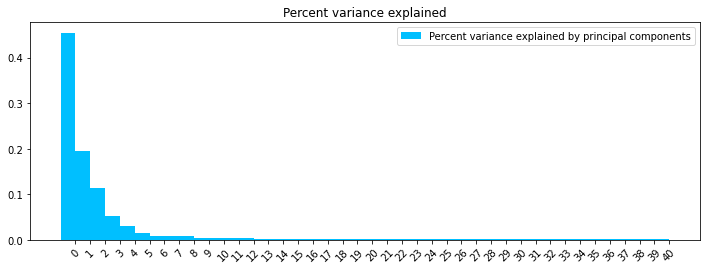

In [ ]:
if pca is not None:
    bar_width = 1
    n_asset = int((1 / 10) * normed_returns.shape[1])
    x_indx = np.arange(n_asset)
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 4)
    # Eigenvalues are measured as percentage of explained variance.
    rects = ax.bar(x_indx, pca.explained_variance_ratio_[:n_asset], bar_width, color='deepskyblue')
    ax.set_xticks(x_indx + bar_width / 2)
    ax.set_xticklabels(list(range(n_asset)), rotation=45)
    ax.set_title('Percent variance explained')
    ax.legend((rects[0],), ('Percent variance explained by principal components',))

Sum of weights of first eigen-portfolio: 100.00


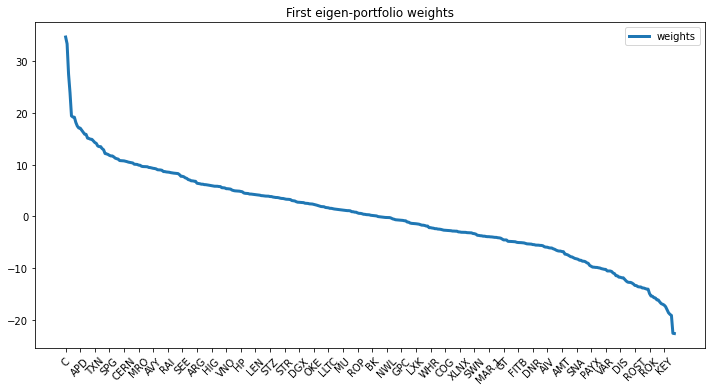

In [ ]:
pc_w = np.zeros(len(stock_tickers))
eigen_prtf1 = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
if pca is not None:
    pcs = pca.components_

    # normalized to 1
    pc_w = pcs[:, 0] / sum(pcs[:, 0])
    eigen_prtf1 = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
    eigen_prtf1.sort_values(by=['weights'], ascending=False, inplace=True)
    print('Sum of weights of first eigen-portfolio: %.2f' % np.sum(eigen_prtf1))
    eigen_prtf1.plot(title='First eigen-portfolio weights',
                     figsize=(12,6),
                     xticks=range(0, len(stock_tickers),10),
                     rot=45,
                     linewidth=3)

In [ ]:
part_3 = list(eigen_prtf1.squeeze().values)
try:
    part3 = " ".join(map(repr, part_3))
except TypeError:
    part3 = repr(part_3)
eigen_prtf1.squeeze().values

array([ 34.69781301,  33.37885387,  27.52382205,  23.91953045,
        19.43229316,  19.19948489,  19.17213852,  18.14863559,
        17.45976197,  17.08974424,  17.05597011,  16.65550558,
        16.27425367,  15.89024326,  15.85400682,  15.12553614,
        15.04751816,  14.92055232,  14.88994997,  14.57601822,
        14.27280438,  14.11081636,  13.60681581,  13.4813205 ,
        13.47794081,  13.09573212,  12.87563893,  12.14774055,
        12.07271902,  11.97185425,  11.79095145,  11.67882883,
        11.67390838,  11.48641856,  11.24685292,  11.14051216,
        11.06761413,  10.7842733 ,  10.75973715,  10.75457355,
        10.72002284,  10.6488538 ,  10.57715405,  10.48031705,
        10.4225648 ,  10.38335093,  10.31344451,  10.07811442,
        10.05270109,  10.03159424,   9.90407122,   9.87320625,
         9.67729466,   9.62277972,   9.61791442,   9.59985298,
         9.58203498,   9.44611247,   9.42063338,   9.35024675,
         9.27786189,   9.24136002,   9.16448332,   9.00

Sum of weights of second eigen-portfolio: 100.00


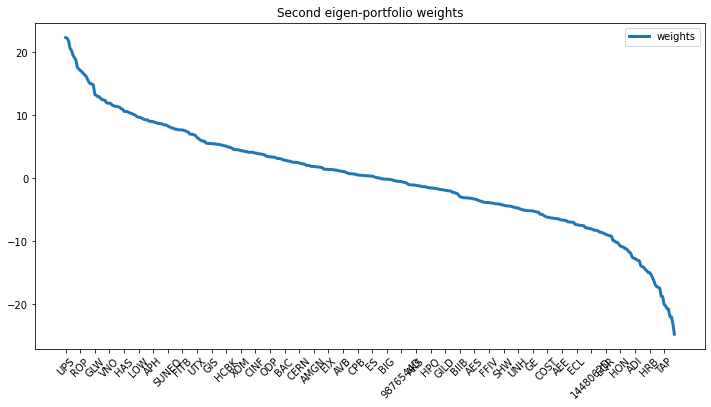

In [ ]:
pc_w = np.zeros(len(stock_tickers))
eigen_prtf2 = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)

if pca is not None:
    pcs = pca.components_
    # normalized to 1
    pc_w = pcs[:, 1] / sum(pcs[:, 1])

    eigen_prtf2 = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
    eigen_prtf2.sort_values(by=['weights'], ascending=False, inplace=True)
    print('Sum of weights of second eigen-portfolio: %.2f' % np.sum(eigen_prtf2))
    eigen_prtf2.plot(title='Second eigen-portfolio weights',
                     figsize=(12,6),
                     xticks=range(0, len(stock_tickers),10),
                     rot=45,
                     linewidth=3)

In [ ]:
part_4 = list(eigen_prtf2.to_numpy().squeeze())
try:
    part4 = " ".join(map(repr, part_4))
except TypeError:
    part4 = repr(part_4)
eigen_prtf2.to_numpy().squeeze()

array([ 22.33655405,  22.26573804,  21.8415071 ,  20.63332887,
        20.30830413,  19.57064733,  19.17132749,  18.77162941,
        17.63470816,  17.35462675,  17.12243127,  16.93255234,
        16.6891601 ,  16.44391949,  16.20341191,  15.75347255,
        15.2348532 ,  15.02418482,  15.00252398,  14.80927037,
        13.29929778,  13.18779809,  12.96503124,  12.95275781,
        12.68214566,  12.49621284,  12.44943067,  12.37317145,
        11.9889169 ,  11.95209576,  11.933164  ,  11.87288034,
        11.61641944,  11.53097873,  11.42841233,  11.426935  ,
        11.37137148,  11.29166009,  11.05867592,  10.98539388,
        10.65354978,  10.60927842,  10.60688141,  10.51724787,
        10.36089183,  10.33223443,  10.19597929,  10.12392388,
         9.97187885,   9.77297695,   9.708555  ,   9.68742267,
         9.56812409,   9.43280093,   9.33720471,   9.29490593,
         9.29111774,   9.08824247,   9.0430739 ,   9.03493688,
         9.00152509,   8.92263209,   8.85213551,   8.74

In [ ]:
def sharpe_ratio(ts_returns, periods_per_year=252):
    """
    sharpe_ratio - Calculates annualized return, annualized vol, and annualized sharpe ratio,
                    where sharpe ratio is defined as annualized return divided by annualized volatility

    Arguments:
    ts_returns - pd.Series of returns of a single eigen portfolio

    Return:
    a tuple of three doubles: annualized return, volatility, and sharpe ratio
    """

    annualized_return = 0.0
    annualized_vol = 0.0
    annualized_sharpe = 0.0

    n_years = ts_returns.shape[0] / periods_per_year
    annualized_return = np.power(np.prod(1 + ts_returns),(1 / n_years)) - 1
    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)
    annualized_sharpe = annualized_return / annualized_vol

    return annualized_return, annualized_vol, annualized_sharpe

First eigen-portfolio:
Return = 42.98%
Volatility = 33.66%
Sharpe = 1.28


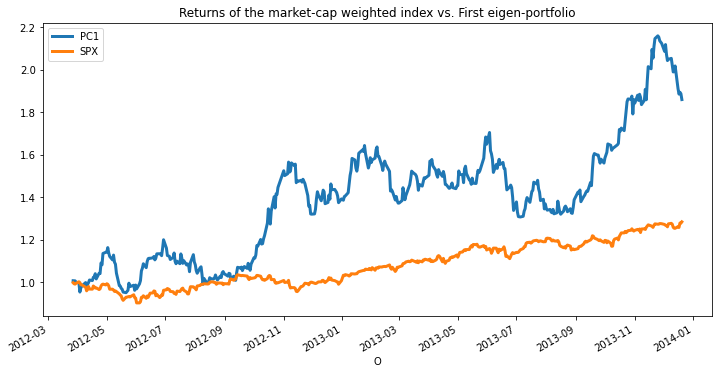

In [ ]:
if df_raw_test is not None:
    eigen_prtf1_returns = np.dot(df_raw_test.loc[:, eigen_prtf1.index],
                                 eigen_prtf1 / 100)

    eigen_prtf1_returns = pd.Series(eigen_prtf1_returns.squeeze(),
                                    index=df_test.index)

    er, vol, sharpe = sharpe_ratio(eigen_prtf1_returns)
    print('First eigen-portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (er*100, vol*100, sharpe))

    year_frac = (eigen_prtf1_returns.index[-1] - eigen_prtf1_returns.index[0]).days / 252

    df_plot = pd.DataFrame({'PC1': eigen_prtf1_returns,
                            'SPX': df_raw_test.loc[:, 'SPX']},
                            index=df_test.index)
    np.cumprod(df_plot + 1).plot(title='Returns of the market-cap weighted index vs. First eigen-portfolio',
                             figsize=(12,6),
                             linewidth=3)

In [ ]:
if df_raw_test is not None:
    eigen_prtf2_returns = np.dot(df_raw_test.loc[:, eigen_prtf2.index], eigen_prtf2 / 100)
    eigen_prtf2_returns = pd.Series(eigen_prtf2_returns.squeeze(), index=df_test.index)
    er, vol, sharpe = sharpe_ratio(eigen_prtf2_returns)
    print('Second eigen-portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (er*100, vol*100, sharpe))

Second eigen-portfolio:
Return = 17.57%
Volatility = 35.37%
Sharpe = 0.50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in power


Eigen portfolio #6 with the highest Sharpe. Return 27078580307.64%, vol = 3032.95%, Sharpe = 8928132.08


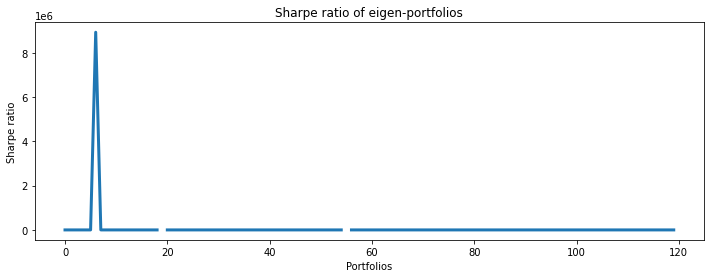

In [ ]:
n_portfolios = 120
annualized_ret = np.array([0.] * n_portfolios)
sharpe_metric = np.array([0.] * n_portfolios)
annualized_vol = np.array([0.] * n_portfolios)
idx_highest_sharpe = 0 # index into sharpe_metric which identifies a portfolio with rhe highest Sharpe ratio

if pca is not None:
    for ix in range(n_portfolios):
        pc_w = pcs[:, ix] / sum(pcs[:, ix])
        eigen_prtfix = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
        eigen_prtfix.sort_values(by=['weights'], ascending=False, inplace=True)

        eigen_prtix_returns = np.dot(df_raw_test.loc[:, eigen_prtfix.index], eigen_prtfix / 100)
        eigen_prtix_returns = pd.Series(eigen_prtix_returns.squeeze(), index=df_test.index)
        er, vol, sharpe = sharpe_ratio(eigen_prtix_returns)
        annualized_ret[ix] = er
        annualized_vol[ix] = vol
        sharpe_metric[ix] = sharpe

    # find portfolio with the highest Sharpe ratio
    idx_highest_sharpe = np.nanargmax(sharpe_metric)

    print('Eigen portfolio #%d with the highest Sharpe. Return %.2f%%, vol = %.2f%%, Sharpe = %.2f' %
          (idx_highest_sharpe,
           annualized_ret[idx_highest_sharpe]*100,
           annualized_vol[idx_highest_sharpe]*100,
           sharpe_metric[idx_highest_sharpe]))

    fig, ax = plt.subplots()
    fig.set_size_inches(12, 4)
    ax.plot(sharpe_metric, linewidth=3)
    ax.set_title('Sharpe ratio of eigen-portfolios')
    ax.set_ylabel('Sharpe ratio')
    ax.set_xlabel('Portfolios')

In [ ]:
results = pd.DataFrame(data={'Return': annualized_ret, 'Vol': annualized_vol, 'Sharpe': sharpe_metric})
results.dropna(inplace=True)
results.sort_values(by=['Sharpe'], ascending=False, inplace=True)
results.head(10)

,Return,Vol,Sharpe
6,2.707858e+08,30.329502,8.928132e+06
42,6.507218e-01,0.236410,2.752508e+00
104,5.408715e-01,0.221470,2.442189e+00
24,8.357680e-01,0.351945,2.374712e+00
97,1.719756e+00,0.731894,2.349733e+00
9,7.900076e-01,0.341566,2.312902e+00
2,4.641763e-01,0.209092,2.219961e+00
94,4.783928e-01,0.217899,2.195483e+00
93,5.748383e-01,0.262132,2.192937e+00
118,1.243794e+00,0.694505,1.790908e+00


In [ ]:
part_5 = list(results.iloc[:, 1].values.squeeze())
try:
    part5 = " ".join(map(repr, part_5))
except TypeError:
    part5 = repr(part_5)
results.iloc[:, 1].values.squeeze()

array([30.32950235,  0.23641047,  0.22147   ,  0.35194498,  0.73189417,
        0.3415655 ,  0.20909204,  0.21789865,  0.26213167,  0.69450477,
        0.15111242,  0.61813502,  0.29360194,  0.49938806,  0.24626954,
        0.33662289,  0.15052615,  0.24983199,  0.44138785,  0.6432981 ,
        0.22242329,  0.95047803,  0.38433484,  0.16808138,  0.18096682,
        0.17635057,  0.16127457,  0.15039435,  0.32786626,  0.84233994,
        0.17627662,  0.25827969,  0.42545759,  0.23185815,  0.68084654,
        0.17426752,  0.17371422,  0.49968192,  0.41661165,  0.198202  ,
        0.38393548,  0.48198465,  0.33553638,  0.46349142,  0.51913797,
        0.23726549,  0.78612727,  0.66221089,  0.20015696,  0.23969725,
        0.12305249,  0.35374487,  0.26873609,  0.49280312,  0.44903937,
        1.15315528,  0.46744327,  0.24397795,  0.36024123,  0.31605458,
        0.16258352,  0.7514453 ,  0.2617829 ,  0.51371547,  0.82321801,
        0.39268404,  1.33827488,  0.17636891,  0.27829472,  0.48

In [ ]:
part6 = str(idx_highest_sharpe)
print(idx_highest_sharpe)

6
